In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df  = pd.read_csv('combined_with_departments.csv')

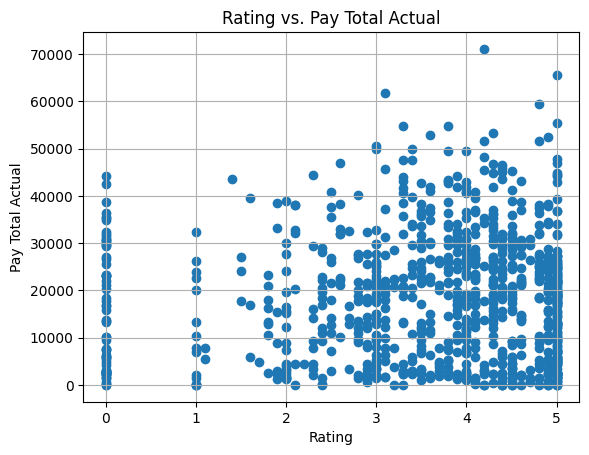

In [2]:
df_filtered = df[df['RATING'] != -1.0]
plt.scatter(df_filtered['RATING'], df_filtered['PAY_TOTAL_ACTUAL'])
plt.xlabel('Rating') 
plt.ylabel('Pay Total Actual')
plt.title('Rating vs. Pay Total Actual')
plt.grid(True)
plt.show()

In [3]:
df_filtered = df[df['RATING'] != -1.0].copy()

bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000]

bin_labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000',
              '25000-30000', '30000-35000', '35000-40000', '40000-45000', '45000-50000', '50000-55000', '55000-60000']

df_filtered['PAY_RANGE'] = pd.cut(df_filtered['PAY_TOTAL_ACTUAL'], bins=bins, labels=bin_labels, right=False)

df_filtered.head()

,Unnamed: 0.1,Unnamed: 0,NAME_LAST,NAME_FIRST,POSITION_TITLE,PAY_TOTAL_ACTUAL,PAY_OTHER_ACTUAL,ANNUAL_RATE,FULL_NAME,RATING,NUM_RATINGS,DEPARTMENT,PAY_RANGE
2,2,777807,Luce,Kristin,Clinical Associate Lecturer A,5833.38,0.00,43333.42,Kristin Luce,4.4,28,Nursing,5000-10000
4,4,805890,Mouffe,Jerome,Assoc Lecturer A,1174.74,0.00,8726.38,Jerome Mouffe,3.9,10,Performing Arts,0-5000
5,5,1001289,McCarthy,Mariah,Associate Lecturer,9396.96,0.00,22000.00,Mariah McCarthy,4.5,2,English,5000-10000
6,6,1134852,Whited,Courtney,Associate Lecturer,10239.03,334.38,44000.00,Courtney Whited,5.0,8,English,10000-15000
12,12,1824022,Reilly,Nicole,Clinical Associate Lecturer,3461.52,0.00,14999.92,Nicole Reilly,2.3,9,Nursing,0-5000


In [4]:
rating_avg_by_pay_range = df_filtered.groupby('PAY_RANGE')['RATING'].mean().reset_index()
print(rating_avg_by_pay_range)

      PAY_RANGE    RATING
0        0-5000  3.413065
1    5000-10000  3.567961
2   10000-15000  3.544681
3   15000-20000  3.812727
4   20000-25000  3.705882
5   25000-30000  3.748598
6   30000-35000  3.381538
7   35000-40000  3.441304
8   40000-45000  3.596970
9   45000-50000  3.973333
10  50000-55000  3.877778
11  55000-60000  4.900000


C:\Users\kenic\AppData\Local\Temp\ipykernel_1352\3299086155.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_avg_by_pay_range = df_filtered.groupby('PAY_RANGE')['RATING'].mean().reset_index()


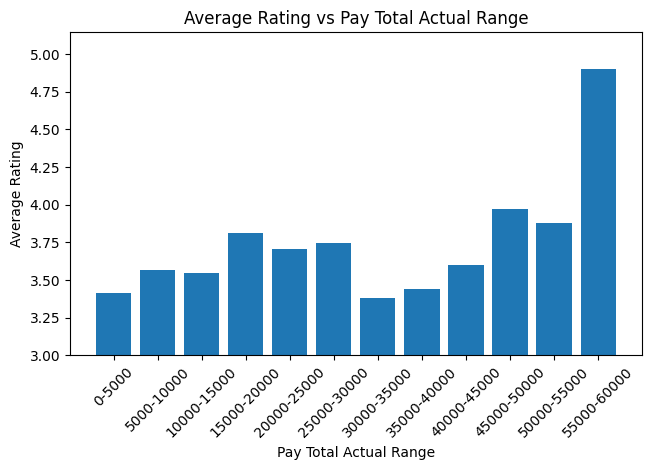

In [5]:
plt.bar(rating_avg_by_pay_range['PAY_RANGE'], rating_avg_by_pay_range['RATING'])
plt.xlabel('Pay Total Actual Range')
plt.ylabel('Average Rating') 
plt.title('Average Rating vs Pay Total Actual Range') 
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(3,)
plt.show()

In [6]:
df_filtered = df[df['RATING'] != -1.0].copy()

# Filter departments based on the number of data
department_counts = df_filtered['DEPARTMENT'].value_counts()
departments_to_include = department_counts[department_counts >= 20].index

df_filtered_major = df_filtered[df_filtered['DEPARTMENT'].isin(departments_to_include)]
department_rating_avg = df_filtered_major.groupby('DEPARTMENT')['RATING'].mean().reset_index()
department_rating_avg_sorted = department_rating_avg.sort_values('RATING', ascending=False)


print(department_rating_avg)

                                  DEPARTMENT    RATING
0                       Accounting & Finance  3.676000
1                               Anthropology  3.923810
2                                    Biology  3.938636
3                           Computer Science  2.875000
4             Counseling & School Psychology  3.512500
5                   Curriculum & Instruction  3.160714
6                                    English  4.035526
7                                    History  3.776000
8                                 Management  3.790323
9   Management Science & Information Systems  3.168000
10                               Mathematics  3.100000
11                                   Nursing  2.855000
12                           Performing Arts  3.775000
13                                Psychology  3.680000
14  School for the Environment Dean's Office  3.175000
15                                 Sociology  4.210000


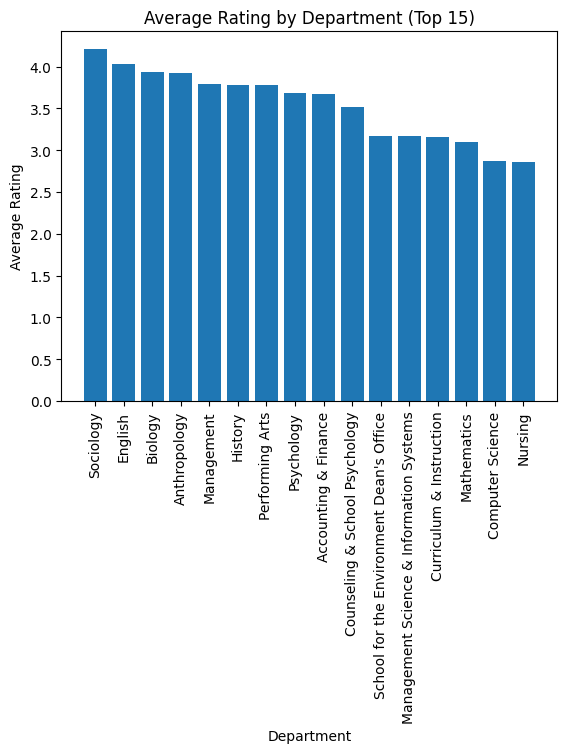

In [7]:
plt.bar(department_rating_avg_sorted['DEPARTMENT'], department_rating_avg_sorted['RATING'])
plt.xlabel('Department') 
plt.ylabel('Average Rating')
plt.title('Average Rating by Department (Top 15)')
plt.xticks(rotation=90)
plt.show()